# 1. Look at the big picture

## 1.1 Frame the problem

**The task/problem**<br>
Box office blabla

**The goal**<br>
To get good predictions blbllblb

**Solution to the problem**<br>
nvfewdc

## 1.2 Select performance measure

It is important to have a way of measuring the performance of the model. There are many different ways of measuring performance, but for this problem we chose the Root Mean Square Error(RMSE). This method measures the standard deviaton of the errors and is widly used as a performance metric with regression problems.

$ RMSE (X, h) = \sqrt{(\frac{1}{m})\sum_{i=1}^{m}(h(x^{i}) - y^{i})^{2}} $

- m: number of instances in the dataset you are measuring the RMSE on. <br>
- $ x^{i} $ : vector of all the feature values (excluding the label) of the ith instance in
the dataset, and $ y^{i} $) is its label (the desired output value for that instance).<br>
- X: matrix containing all the feature values (excluding labels) of all instances in
the dataset.<br>
- h: the system’s prediction function, also called a hypothesis.<br>
- RMSE(X,h) is the cost function measured on the set of examples using your
hypothesis h.

# 2 Get the data

## 2.1 Setup

In [1]:
#To display plots directly in the notebook
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import sklearn
import ast

# To make the notebook reproducible
seed = 42
np.random.seed(seed)

## 2.2 Importing the data

Here we list the files found in the data folder.

In [2]:
import os
print(os.listdir("data"))

['sample_submission.csv', 'test.csv', 'train.csv']


The train.csv file is the one we will use to train, validate and test our model. <br><br>
By using Pandas we create DataFrames containing the datasets.

In [3]:
films = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

## 2.2 Taking a look at the data

To get a quick overview of the data we can use the head() function. 

In [4]:
films.head(10)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970
5,6,NaN,8000000,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",NaN,tt0093743,en,Pinocchio and the Emperor of the Night,"Pinocchio and his friends, a glow worm and a m...",0.743274,...,8/6/87,83.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Pinocchio and the Emperor of the Night,NaN,"[{'cast_id': 6, 'character': 'Pinocchio (voice...","[{'credit_id': '52fe46f49251416c9106558b', 'de...",3261638
6,7,NaN,14000000,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",http://www.thepossessionmovie.com/,tt0431021,en,The Possession,A young girl buys an antique box at a yard sal...,7.286477,...,8/30/12,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Fear The Demon That Doesn't Fear God,The Possession,NaN,"[{'cast_id': 23, 'character': 'Clyde', 'credit...","[{'credit_id': '52fe4981c3a368484e12ee29', 'de...",85446075
7,8,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,tt0391024,en,Control Room,A chronicle which provides a rare window into ...,1.949044,...,1/15/04,84.0,"[{'iso_639_1': 'ar', 'name': 'العربية'}, {'iso...",Released,Different channels. Different truths.,Control Room,"[{'id': 917, 'name': 'journalism'}, {'id': 163...","[{'cast_id': 2, 'character': 'Himself', 'credi...","[{'credit_id': '52fe47a69251416c750a0daf', 'de...",2586511
8,9,"[{'id': 256377, 'name': 'The Muppet Collection...",0,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",NaN,tt0117110,en,Muppet Treasure Island,After telling the story of Flint's last journe...,6.902423,...,2/16/96,100.0,"[{'

Here we see that some of the columns contains dictionaries. These will have to be explored further.<br><br>
To get more info on the dataset we use the info() method

In [5]:
films.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

From this we see that there are 23 attributes of various type. Most of them are objects, but there are some ints and floats. We can also see that there are 3000 entries, which is a bit few for ML standards, and some of the attributes have fewer non null values. <br><br>
From the table below we can see the count, mean, standard deviation as well as the minimun, 25%, 50%, 75% and max entry. (This is only done with the numerical attributes).<br>
The id column is not important here.

In [6]:
films.describe()

,id,budget,popularity,runtime,revenue
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07
std,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


We will drop some of the more unnecessary columns, such as id, homepage, imdb_id, overview, poster path, status and tagline.

In [7]:
dropping = ['id', 'homepage', 'imdb_id', 'overview', 'poster_path', 'status', 'tagline', 'title', 'original_title', 'Keywords']

films = films.drop(dropping, axis=1)
test = test.drop(dropping, axis=1)

### Looking at the dictionaries

#### Belongs_to_collection

The first column with dictionaries is the belongs_to_collection column. Not all instances will have a non null value here, from the table above we see that only 604 have.

In [8]:
print(films['belongs_to_collection'][0:5])

0    [{'id': 313576, 'name': 'Hot Tub Time Machine ...
1    [{'id': 107674, 'name': 'The Princess Diaries ...
2                                                  NaN
3                                                  NaN
4                                                  NaN
Name: belongs_to_collection, dtype: object


The most interesting thing from the belongs_to_collection may be if the movie is in a series.

In [9]:
films['has_collection'] = np.where(pd.notnull(films['belongs_to_collection']), 1, 0)
test['has_collection'] = np.where(pd.notnull(test['belongs_to_collection']), 1, 0)

films = films.drop(['belongs_to_collection'], axis=1) 
test = test.drop(['belongs_to_collection'], axis=1) 

In [10]:
films['has_collection'][:5]

0    1
1    1
2    0
3    0
4    0
Name: has_collection, dtype: int32

#### Genre 

In [11]:
films['genres'] = films['genres'].apply(lambda x: list(map(lambda d: list(d.values())[1], ast.literal_eval(x)) if isinstance(x, str) else []))

In [12]:
films['genres'].head(5)

0                            [Comedy]
1    [Comedy, Drama, Family, Romance]
2                             [Drama]
3                   [Thriller, Drama]
4                  [Action, Thriller]
Name: genres, dtype: object

In [13]:
films['num_genres'] = films['genres'].apply(lambda x: len(x) if x != {} else 0)
films['num_genres'].head()    

0    1
1    4
2    1
3    2
4    2
Name: num_genres, dtype: int64

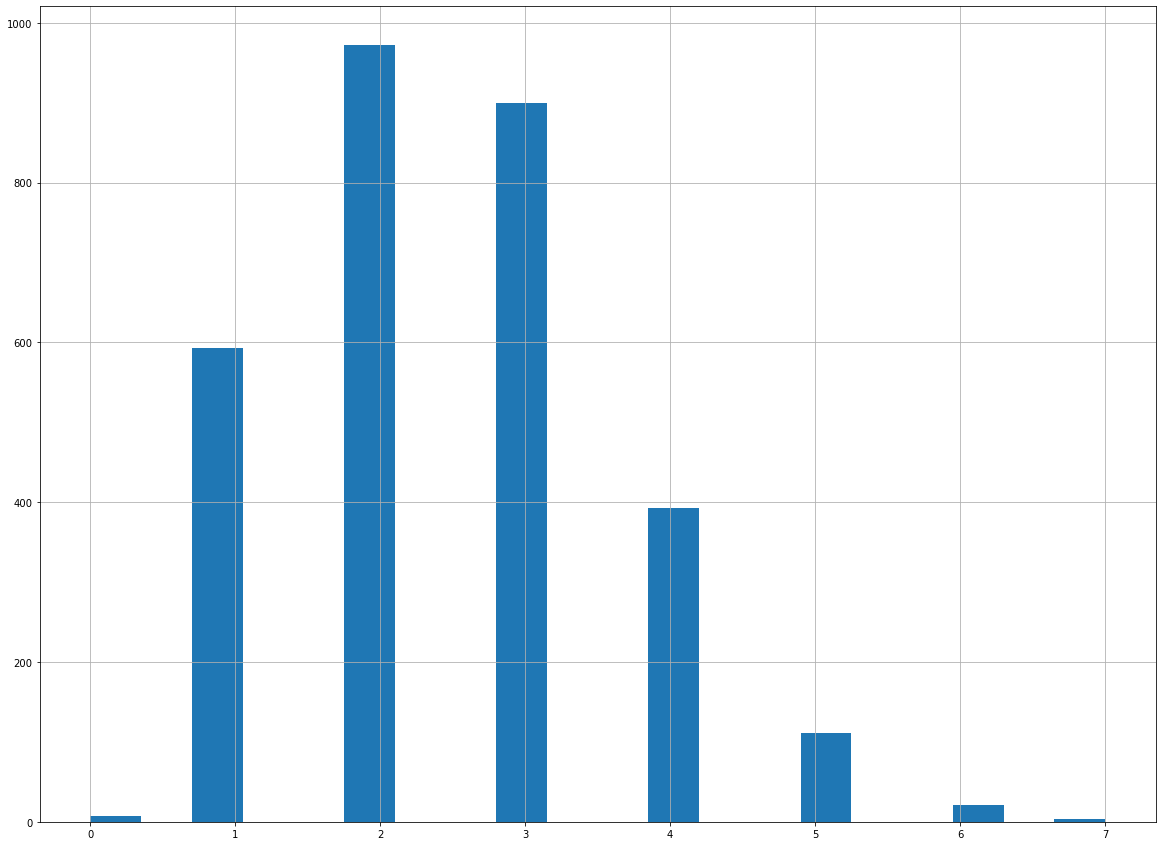

In [14]:
films['num_genres'].hist(bins=20, figsize=(20,15))
plt.show()

In [15]:
films['num_genres'].value_counts()

2    972
3    900
1    593
4    393
5    111
6     21
0      7
7      3
Name: num_genres, dtype: int64

#### Cast

In [16]:
films['cast'][1]

'[{\'cast_id\': 1, \'character\': \'Mia Thermopolis\', \'credit_id\': \'52fe43fe9251416c7502561f\', \'gender\': 1, \'id\': 1813, \'name\': \'Anne Hathaway\', \'order\': 0, \'profile_path\': \'/jUMOKwSUBnTcMeN1HfhutiY49Ad.jpg\'}, {\'cast_id\': 2, \'character\': \'Queen Clarisse Renaldi\', \'credit_id\': \'52fe43fe9251416c75025623\', \'gender\': 1, \'id\': 5823, \'name\': \'Julie Andrews\', \'order\': 1, \'profile_path\': \'/6t61jkmfSA6nbYRCKR9s97CgUN6.jpg\'}, {\'cast_id\': 3, \'character\': \'Joe\', \'credit_id\': \'52fe43fe9251416c75025627\', \'gender\': 2, \'id\': 1210, \'name\': \'H√©ctor Elizondo\', \'order\': 2, \'profile_path\': \'/48UNfVFZVr0jyMIlLPhzm8IIM7f.jpg\'}, {\'cast_id\': 4, \'character\': \'Viscount Mabrey\', \'credit_id\': \'52fe43fe9251416c7502562b\', \'gender\': 2, \'id\': 655, \'name\': \'John Rhys-Davies\', \'order\': 3, \'profile_path\': \'/zZ67PuoFfik9QlZyfaEsFBC1yVJ.jpg\'}, {\'cast_id\': 5, \'character\': \'Lilly Moscovitz\', \'credit_id\': \'52fe43fe9251416c7502

The most interresting with cast is the names of the actors.

In [17]:
films['cast'] = films['cast'].apply(lambda x: list(map(lambda d: list(d.values())[5], ast.literal_eval(x)) if isinstance(x, str) else []))

In [18]:
films['cast'].head()

0    [Rob Corddry, Craig Robinson, Clark Duke, Adam...
1    [Anne Hathaway, Julie Andrews, H√©ctor Elizond...
2    [Miles Teller, J.K. Simmons, Melissa Benoist, ...
3    [Vidya Balan, Nawazuddin Siddiqui, Parambrata ...
4    [Kim Kang-woo, Jo Jae-hyeon, Park Si-yeon, Kim...
Name: cast, dtype: object

In [19]:
films['cast'].apply(lambda x: len(x) if x != {} else 0).value_counts()

15     212
16     165
10     135
13     129
12     124
      ... 
90       1
88       1
84       1
82       1
134      1
Name: cast, Length: 109, dtype: int64

#### Original language

In [20]:
films['original_language'].head()

0    en
1    en
2    en
3    hi
4    ko
Name: original_language, dtype: object

#### Production companies

Here the name of the production companies is the most important, and maybe the number of companies in one movie.

In [21]:
films['production_companies'].head()

0    [{'name': 'Paramount Pictures', 'id': 4}, {'na...
1          [{'name': 'Walt Disney Pictures', 'id': 2}]
2    [{'name': 'Bold Films', 'id': 2266}, {'name': ...
3                                                  NaN
4                                                  NaN
Name: production_companies, dtype: object

In [22]:
films['production_companies'] = films['production_companies'].apply(lambda x: list(map(lambda d: list(d.values())[0], ast.literal_eval(x)) if isinstance(x, str) else []))

In [23]:
films['production_companies'].head()

0    [Paramount Pictures, United Artists, Metro-Gol...
1                               [Walt Disney Pictures]
2    [Bold Films, Blumhouse Productions, Right of W...
3                                                   []
4                                                   []
Name: production_companies, dtype: object

In [24]:
films['production_companies'].apply(lambda x: len(x) if x != [] else 0).value_counts()

1     775
2     734
3     582
4     312
5     166
0     156
6     118
7      62
8      42
9      29
11      7
10      7
12      3
16      2
15      2
14      1
13      1
17      1
Name: production_companies, dtype: int64

Most of the movies have 1 or 2 production companies, but there are also some that have none.

In [25]:
from collections import Counter
Counter([i for j in films['production_companies'] for i in j]).most_common(30)

[('Warner Bros.', 202),
 ('Universal Pictures', 188),
 ('Paramount Pictures', 161),
 ('Twentieth Century Fox Film Corporation', 138),
 ('Columbia Pictures', 91),
 ('Metro-Goldwyn-Mayer (MGM)', 84),
 ('New Line Cinema', 75),
 ('Touchstone Pictures', 63),
 ('Walt Disney Pictures', 62),
 ('Columbia Pictures Corporation', 61),
 ('TriStar Pictures', 53),
 ('Relativity Media', 48),
 ('Canal+', 46),
 ('United Artists', 44),
 ('Miramax Films', 40),
 ('Village Roadshow Pictures', 36),
 ('Regency Enterprises', 31),
 ('BBC Films', 30),
 ('Dune Entertainment', 30),
 ('Working Title Films', 30),
 ('Fox Searchlight Pictures', 29),
 ('StudioCanal', 28),
 ('Lionsgate', 28),
 ('DreamWorks SKG', 27),
 ('Fox 2000 Pictures', 25),
 ('Summit Entertainment', 24),
 ('Hollywood Pictures', 24),
 ('Orion Pictures', 24),
 ('Amblin Entertainment', 23),
 ('Dimension Films', 23)]

#### Production countries

In [26]:
films['production_countries'].head()

0    [{'iso_3166_1': 'US', 'name': 'United States o...
1    [{'iso_3166_1': 'US', 'name': 'United States o...
2    [{'iso_3166_1': 'US', 'name': 'United States o...
3              [{'iso_3166_1': 'IN', 'name': 'India'}]
4        [{'iso_3166_1': 'KR', 'name': 'South Korea'}]
Name: production_countries, dtype: object

We chose to only have the names of the countries.

In [27]:
films['production_countries'] = films['production_countries'].apply(lambda x: list(map(lambda d: list(d.values())[1], ast.literal_eval(x)) if isinstance(x, str) else []))

In [28]:
films['production_countries'].head()

0    [United States of America]
1    [United States of America]
2    [United States of America]
3                       [India]
4                 [South Korea]
Name: production_countries, dtype: object

In [29]:
Counter([i for j in films['production_countries'] for i in j]).most_common(30)

[('United States of America', 2282),
 ('United Kingdom', 380),
 ('France', 222),
 ('Germany', 167),
 ('Canada', 120),
 ('India', 81),
 ('Italy', 64),
 ('Japan', 61),
 ('Australia', 61),
 ('Russia', 58),
 ('Spain', 54),
 ('China', 42),
 ('Hong Kong', 42),
 ('Ireland', 23),
 ('Belgium', 23),
 ('South Korea', 22),
 ('Mexico', 19),
 ('Sweden', 18),
 ('New Zealand', 17),
 ('Netherlands', 15),
 ('Czech Republic', 14),
 ('Denmark', 13),
 ('Brazil', 12),
 ('Luxembourg', 10),
 ('South Africa', 10),
 ('Hungary', 9),
 ('United Arab Emirates', 9),
 ('Austria', 8),
 ('Switzerland', 8),
 ('Romania', 8)]

In [30]:
films['production_countries'].apply(lambda x: len(x) if x != [] else 0).value_counts()

1    2222
2     525
3     116
4      57
0      55
5      21
6       3
8       1
Name: production_countries, dtype: int64

Most films have only one production country, and most of them are in the US

#### Release date

There may be multiple interesting aspects of the release date. Which year it was released is of course important for the revenue, as the revenue tend to go up when the film is newer. But maybe the time of year the film is released or even the day of the week plays a role in the revenue?

In [31]:
films['release_date'].head()

0     2/20/15
1      8/6/04
2    10/10/14
3      3/9/12
4      2/5/09
Name: release_date, dtype: object

In [32]:
films[['release_month', 'release_day', 'release_year']] = films['release_date'].str.split('/', expand=True).replace(np.nan, -1).astype(int)

In [33]:
def fix_year(year):
    if year <= 19:
        return 2000 + year
    else:
        return 1900 + year

In [34]:
films['release_year'] = films['release_year'].apply(lambda x: fix_year(x))

In [35]:
films['release_year']

0       2015
1       2004
2       2014
3       2012
4       2009
        ... 
2995    1994
2996    2013
2997    1996
2998    2004
2999    2011
Name: release_year, Length: 3000, dtype: int64

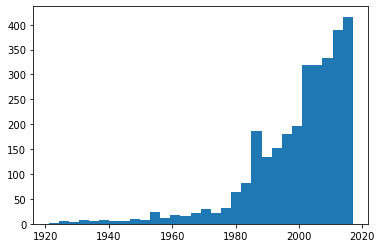

In [36]:
plt.hist(films['release_year'].sort_values(), bins = 30, align='mid')
plt.show()

In [38]:
release_date = pd.to_datetime(films['release_date'])

0      2015-02-20
1      2004-08-06
2      2014-10-10
3      2012-03-09
4      2009-02-05
          ...    
2995   1994-04-22
2996   2013-03-28
2997   1996-10-11
2998   2004-01-16
2999   2011-09-22
Name: release_date, Length: 3000, dtype: datetime64[ns]


In [43]:
films['day_of_week'] = pd.to_datetime(films['release_date']).dt.day_name()

In [44]:
films['day_of_week']

0         Friday
1         Friday
2         Friday
3         Friday
4       Thursday
          ...   
2995      Friday
2996    Thursday
2997      Friday
2998      Friday
2999    Thursday
Name: day_of_week, Length: 3000, dtype: object

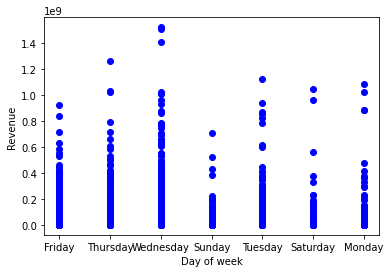

In [48]:
plt.plot(films['day_of_week'], films['revenue'], 'bo')
plt.xlabel('Day of week')
plt.ylabel('Revenue')
plt.show()

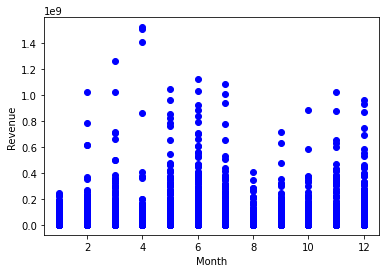

In [51]:
plt.plot(films['release_month'], films['revenue'], 'bo')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()

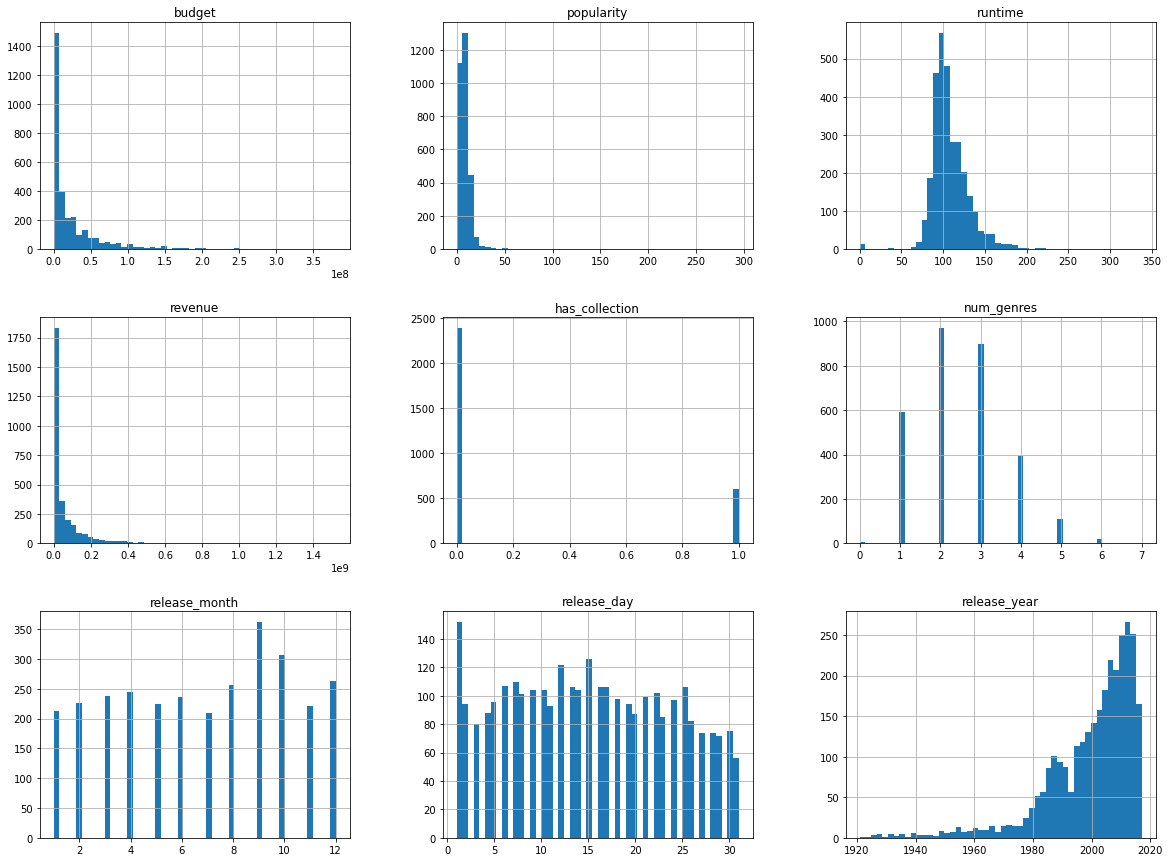

In [37]:
films.hist(bins=50, figsize=(20,15))
plt.show()

The revenue and budget is likely to be correlated, so we will look further at these. Also from the histograms above we notice that that the revenue and budget are very skewed. Therefore we will use